## Importing  Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from windrose import WindroseAxes
import matplotlib.pyplot as plt

## Loading the data

In [2]:
df = pd.read_csv("../data/togo-dapaong_qc.csv")

In [3]:
# lets check if the dataset is loaded
print(f"The shape of dataset is {df.shape}")
print(f"This dataset has {df.shape[0]} rows (examples of data).")
print(f"This dataset has {df.shape[1]} columns (features of data).")


The shape of dataset is (525600, 19)
This dataset has 525600 rows (examples of data).
This dataset has 19 columns (features of data).


# 1. Summary Statistics & Missing-Value Report

In [4]:
# first five rows of tabular data
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [5]:
# log the last examples of this dataset
df.tail()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-10-24 23:56,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525596,2022-10-24 23:57,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525597,2022-10-24 23:58,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,NaN
525598,2022-10-24 23:59,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN
525599,2022-10-25 00:00,-1.2,0.0,0.0,0.0,0.0,25.4,52.3,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN


In [6]:
# log random 5 exaples of the dataset
df.sample(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
523155,2022-10-23 07:16,266.1,406.2,115.5,271.4,257.4,25.7,67.3,1.5,1.9,0.4,222.8,11.8,978,0,0.0,37.0,40.1,NaN
372197,2022-07-10 11:18,830.0,264.7,537.6,771.6,763.5,25.9,86.0,3.4,4.9,0.8,246.9,15.7,979,0,0.0,39.8,45.7,NaN
11697,2021-11-02 02:58,-2.7,0.0,0.0,0.0,0.0,23.7,89.1,2.2,2.9,0.4,230.1,7.9,976,0,0.0,22.6,22.3,NaN
435806,2022-08-23 15:27,260.4,0.0,260.3,259.0,257.3,25.8,78.1,2.9,3.9,0.6,212.9,17.1,975,0,0.0,32.2,33.7,NaN
461179,2022-09-10 06:20,34.4,0.0,32.9,33.7,33.5,23.1,96.9,1.3,1.9,0.5,196.9,11.3,978,0,0.0,23.9,23.8,NaN


In [7]:
# check more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [8]:
# check if a null value exists
print("Check for missing values:")
df.isna().sum()

Check for missing values:


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [9]:
# 1. Calculate the percentage of missing values for every column
null_percentages = df.isnull().sum() / len(df) * 100

# 2. Filter the resulting Series for percentages greater than 5
columns_with_high_nulls = null_percentages[null_percentages > 5]

# 3. Print the results
print("Columns with >5% Null Values:")
print(columns_with_high_nulls)

Columns with >5% Null Values:
Comments    100.0
dtype: float64


In [10]:
# Drop the column that contains virtually no data
df.drop(columns=['Comments'], inplace=True)

In [11]:
# check if null column dorped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [12]:
# Check if null rows exist
# 1. Define the critical columns
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB','Timestamp', 'Tamb','RH','WS','WSgust','WSstdev','WD','WDstdev','Cleaning','Precipitation','TModA','TModB']

# 2. Create a boolean mask:
missing_rows_mask = df[key_cols].isnull().any(axis=1)

# 3. Use the mask to display the subset of rows with missing data
missing_value_rows = df[missing_rows_mask]

# 4. Display the resulting DataFrame
print(f"Total rows with missing values in the key columns: {len(missing_value_rows)}")
print("Rows with Missing Data (only showing the key columns for focus):")
print(missing_value_rows[key_cols])

Total rows with missing values in the key columns: 0
Rows with Missing Data (only showing the key columns for focus):
Empty DataFrame
Columns: [GHI, DNI, DHI, ModA, ModB, Timestamp, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, Cleaning, Precipitation, TModA, TModB]
Index: []


In [13]:
# Cardinality (uniqueness) for categoricals
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
cardinality = {c: df[c].nunique() for c in cat_cols}
print("Cardinality (categoricals):", cardinality)

Cardinality (categoricals): {'Timestamp': 525600}


In [14]:
#Overview of categorical columns
print("The description of the categorical columns:")
print(df.describe(include=['object']))

The description of the categorical columns:
               Timestamp
count             525600
unique            525600
top     2021-10-25 00:01
freq                   1


In [15]:
# log and check the frequency, and uniqueness of all dataset column
print("The description of all columns:")
print(df.describe(include='all'))


The description of all columns:
               Timestamp            GHI            DNI            DHI  \
count             525600  525600.000000  525600.000000  525600.000000   
unique            525600            NaN            NaN            NaN   
top     2021-10-25 00:01            NaN            NaN            NaN   
freq                   1            NaN            NaN            NaN   
mean                 NaN     230.555040     151.258469     116.444352   
std                  NaN     322.532347     250.956962     156.520714   
min                  NaN     -12.700000       0.000000       0.000000   
25%                  NaN      -2.200000       0.000000       0.000000   
50%                  NaN       2.100000       0.000000       2.500000   
75%                  NaN     442.400000     246.400000     215.700000   
max                  NaN    1424.000000    1004.500000     805.700000   

                 ModA           ModB           Tamb             RH  \
count   525600.000000

In [16]:
#check if duplication of rows exist
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

Duplicate rows: 0


In [17]:
# Cardinality (uniqueness) for categoricals
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
cardinality = {c: df[c].nunique() for c in cat_cols}
print("Cardinality (categoricals):", cardinality)

Cardinality (categoricals): {'Timestamp': 525600}



# 2) Univariant Analysis


 Let's Apply Exploratory Data Analysis Technique

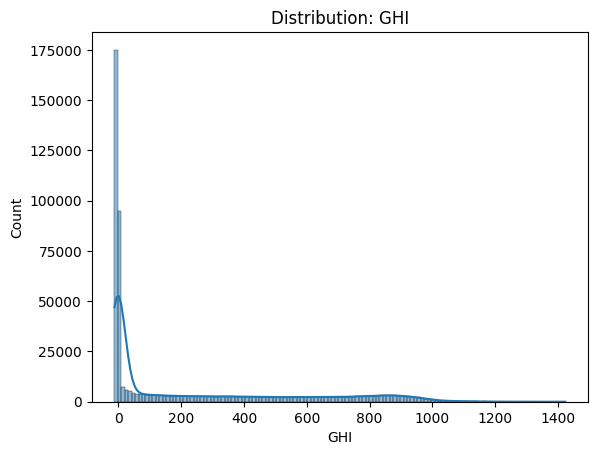

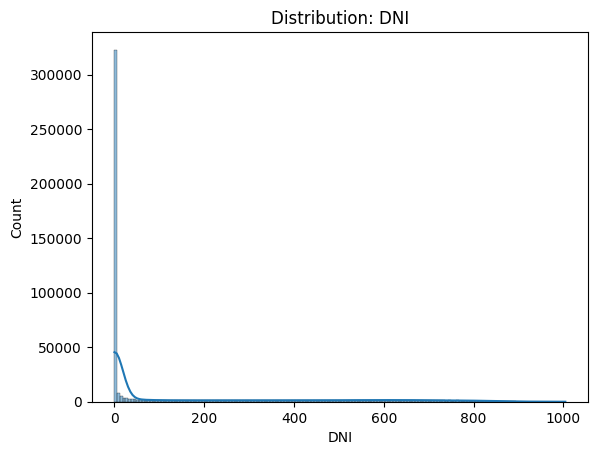

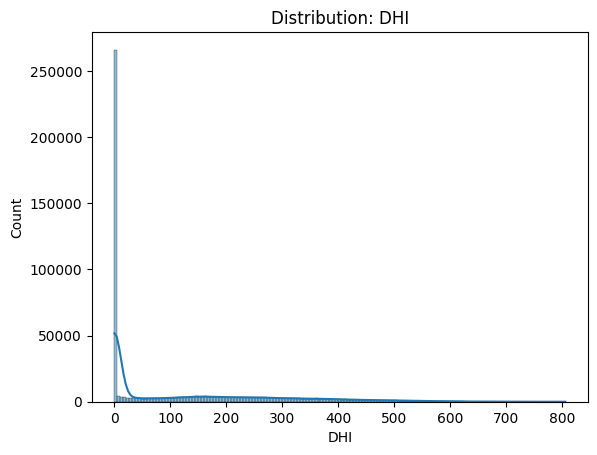

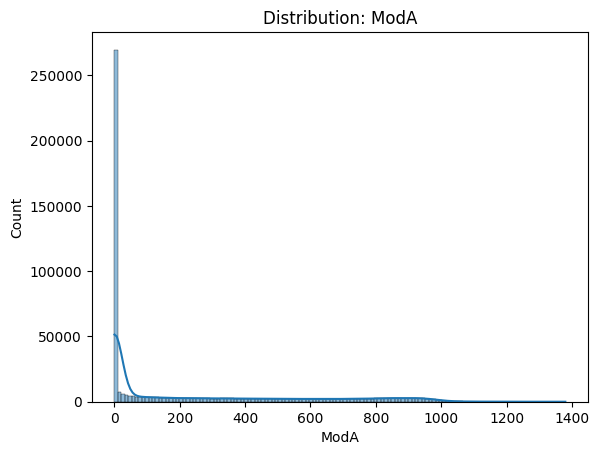

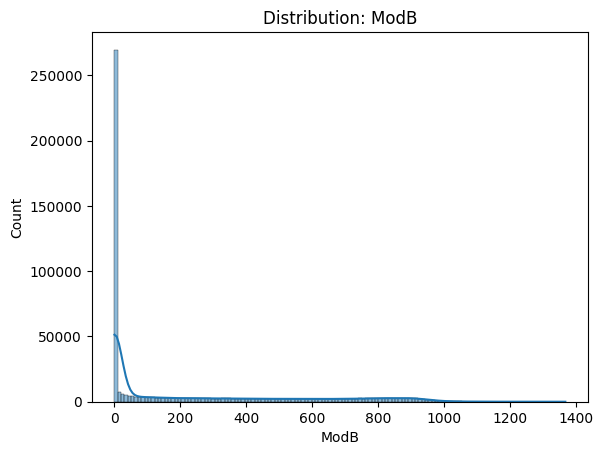

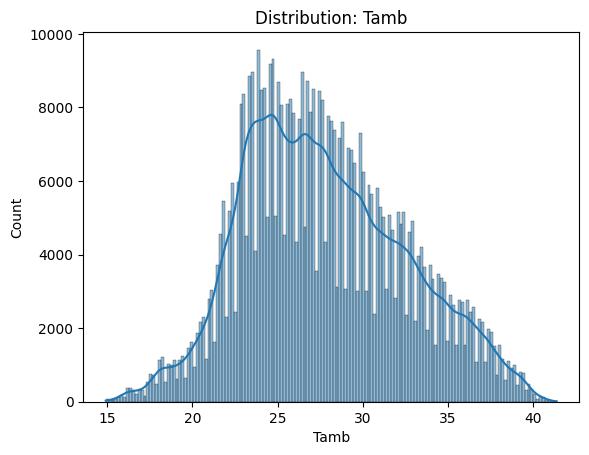

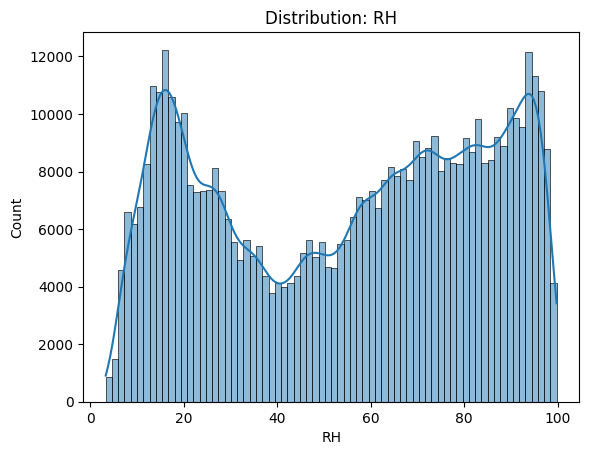

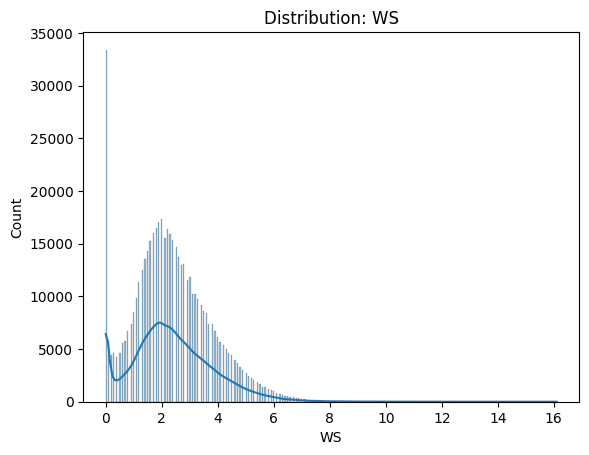

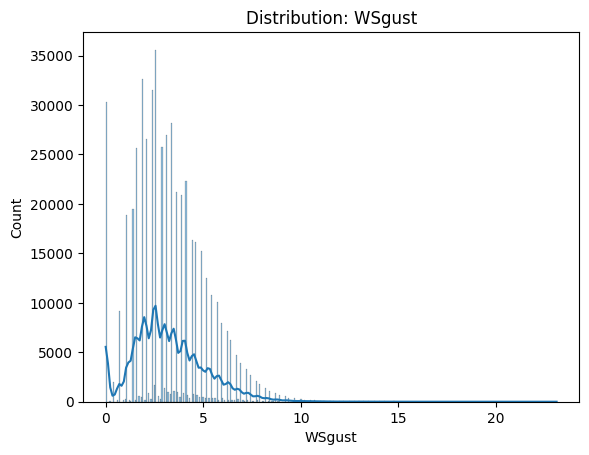

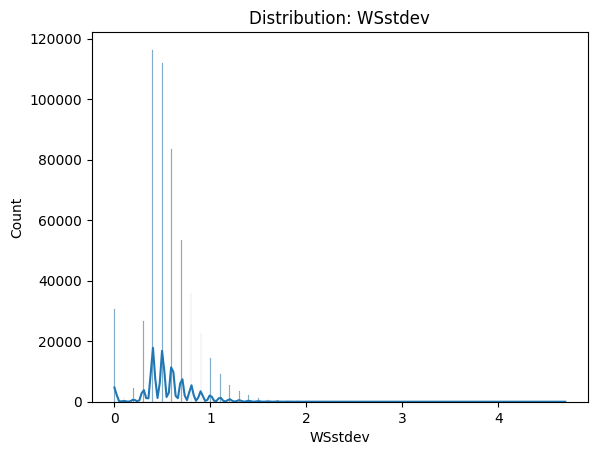

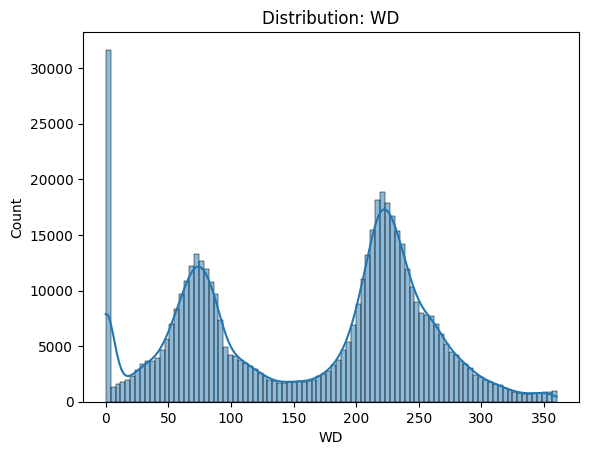

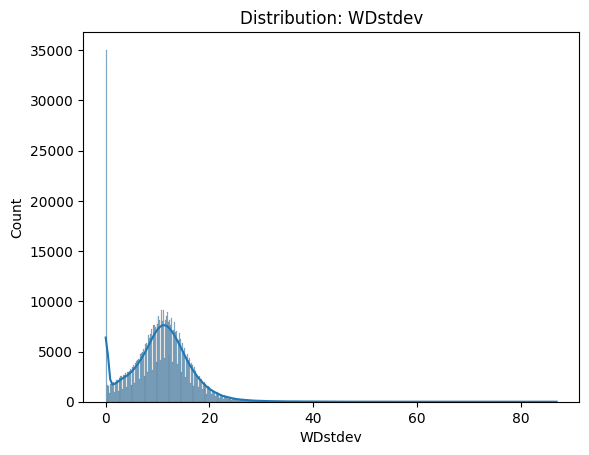

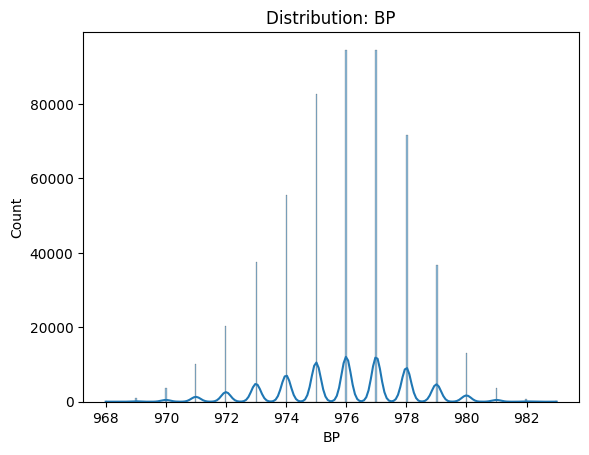

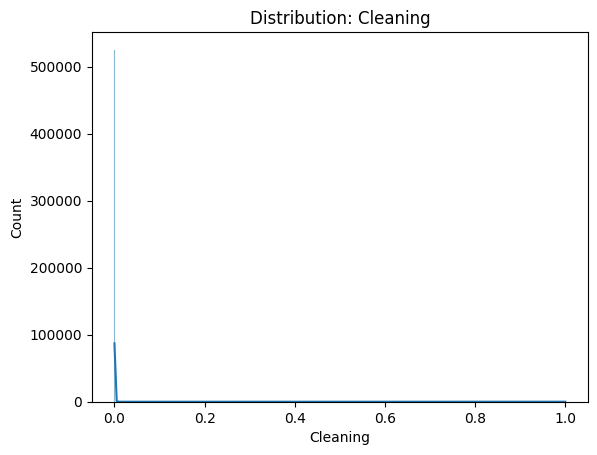

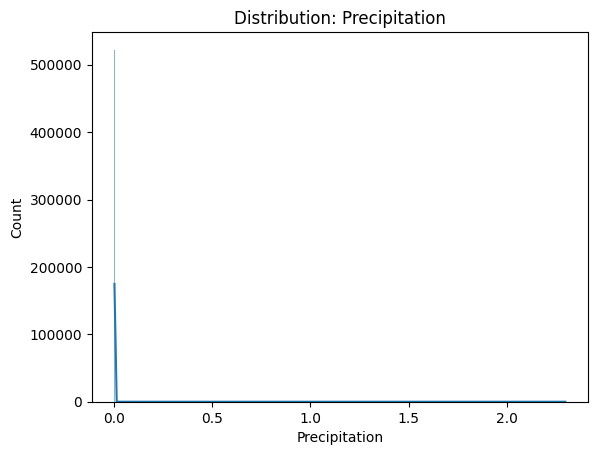

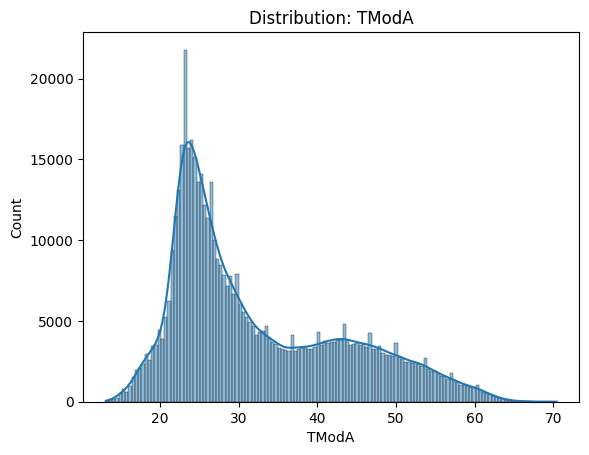

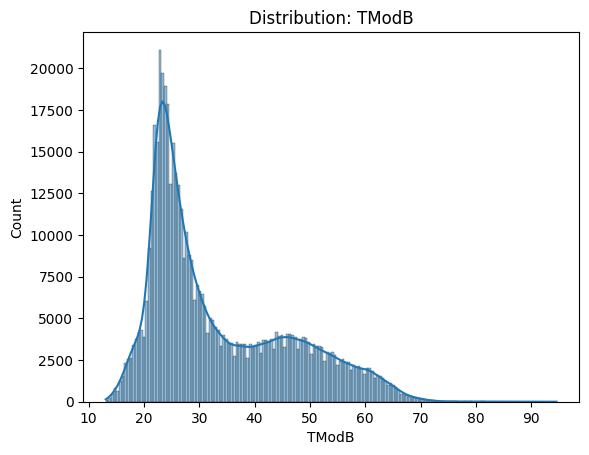

In [18]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    plt.figure()
    sns.histplot(df[c], kde=True)
    plt.title(f"Distribution: {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()


# Univariant Analysis - Intepretation


## DHI distribution intepretation
- Extreme Right Skew: The distribution is highly positively skewed, with the maximum count at the lowest values.
- Mode at Zero: The mode is at $0 \text{ W/m}^2$ (Night/Dark hours), accounting for the largest frequency of data points.
- Long Tail: The remaining data forms a long, low-frequency tail extending up to $1400 \text{ W/m}^2$ (Clear daylight hours).

---


## Direct normal irradiance interpretation
- Extreme Right Skew: The distribution is extremely positively skewed. Almost all data points are concentrated at the low end of the DNI scale.
- Mode at Zero: The mode is decisively at $0 \text{ W/m}^2$. This high count reflects all the time steps when the direct beam of sunlight is absent or blocked by thick clouds/nighttime.- 
- Rapid Drop-Off: The frequency drops off much faster than the GHI distribution. This indicates that while maximum DNI reaches $1000 \text{ W/m}^2$, the data spends very little time at these high-value clear-sky conditions compared to GHI, which includes scattered light.

---

## Diffusion horizontal irradiance intepretation
- Extreme Right Skew: The distribution is extremely positively skewed. The vast majority of data points are concentrated near $0 \text{ W/m}^2$.
- Mode at Zero: The mode is at $0 \text{ W/m}^2$ (Nighttime/Dark). This count is high because DHI is zero whenever the sun is down.
- Maximum Range: DHI values form a long tail that extends up to approximately $800 \text{ W/m}^2$. Unlike DNI, DHI is often substantial even on cloudy days, meaning the frequency decreases less sharply away from zero than DNI does.

---

## ModA distribution intepretation

- Extreme Right Skew: The distribution is extremely positively skewed, with nearly all data clustered at the minimum values.
- Mode at Zero: The mode is sharply peaked at $0$ on the ModA axis. Since ModA is an irradiance measurement (likely Module Irradiance or similar), this high count represents the total time the module was dark or covered (nighttime/heavy shade).
- Maximum Range: The data has a long, low-frequency tail extending up to $1400$. This indicates that while maximum module irradiance is high, the system spends the majority of its time either completely dark or receiving very low irradiance.


---

## ModB distribution intepretation
- Extreme Right Skew: The distribution is extremely positively skewed, with nearly all data clustered at the minimum values.
- Mode at Zero: The mode is sharply peaked at $0$ on the ModB axis. As ModB is an irradiance measurement, this high count represents the total time the module was dark or covered (nighttime/heavy shade).
- Maximum Range: The data has a long, low-frequency tail extending up to $1400$. This indicates that while maximum module irradiance is high, the system spends the majority of its time either completely dark or receiving very low irradiance. The shape is nearly identical to the GHI and ModA distributions, confirming its behavior as an irradiance sensor.

---

## Ambient Temprature distribution intepretation
- Near-Normal Distribution: The distribution is roughly bell-shaped but with a slight negative (left) skew, indicating more measurements were taken at temperatures slightly above the central tendency.
- Peak Range: The distribution is centered around the $25^\circ \text{C}$ to $28^\circ \text{C}$ range, which is the most frequently recorded ambient temperature.
- Overall Range: The temperatures span from a minimum around $15^\circ \text{C}$ to a maximum around $40^\circ \text{C}$, suggesting a consistently warm climate with significant diurnal temperature variation.

---

## Relative Humidity intepretation
- Bimodal Distribution: The distribution is distinctly bimodal, meaning it has two primary peaks (modes).
- Peak Ranges: The two modes are centered around $15\%$ to $20\%$ (low humidity) and $90\%$ to $100\%$ (high humidity). This pattern is typical for a desert or semi-arid climate where humidity is either very low during the day (driven by high temperatures/solar intensity) or very high overnight/early morning (driven by lower temperatures/dew point).
- Frequency Trough: The least frequently recorded RH values occur in the mid-range (around $40\%$ to $50\%$), forming a visible trough between the two modes.

---


## Wind speed distribution intepretation
- Skewed and Bimodal: The distribution is highly skewed to the right (positive skew) and appears to be bimodal.Primary Peak: The main peak (mode) is around $2 \text{ to } 3 \text{ m/s}$, indicating this is the most common wind speed experienced.
- Secondary Peak/Clustering: There is a distinct, sharp secondary peak/cluster at $0 \text{ m/s}$. This represents periods of absolute calm or measurement intervals where the wind speed was rounded down to zero. 
- The frequency quickly drops after the main peak, with very high wind speeds (above $8 \text{ m/s}$) being rare.

---

## Wind speed gust distribution and intepretation
- Extreme Right Skew: The distribution is highly positively skewed (skewed to the right), indicating high wind gusts are rare events.

- Mode Range: The highest frequency (mode) occurs in the low-to-moderate range, specifically around $2.5 \text{ to } 3.5 \text{ m/s}$. This shows that most measured wind gusts are relatively light.

- Frequency Drop-Off: The count drops rapidly after the mode, with very high gusts (above $10 \text{ m/s}$) being extremely infrequent across the entire measurement period.

---

## Wind speed standard deviation distribution and intepretation
- Extreme Right Skew: The distribution is extremely positively skewed, indicating that the wind speed is usually very stable with low variation.
- Mode Near Zero: The highest frequency (mode) occurs at a very low value, specifically around $0.4 \text{ to } 0.6$, showing that the standard deviation of wind speed is typically minimal.
- Low Turbulence: The frequency drops off extremely fast, indicating that high wind turbulence (high WSstdev, e.g., above $1.5$) is highly infrequent.

---

## Wind direction distribution and intepretation
- Bimodal Distribution: The distribution is distinctly bimodal, indicating that wind predominantly comes from two opposite directional sectors.
- Peak Directions: The two major peaks (modes) are centered around $75^\circ$ to $90^\circ$ (East/East-Northeast) and $210^\circ$ to $240^\circ$ (Southwest/West-Southwest). This suggests the site experiences prevailing winds that typically flow along an axis (e.g., a valley or general regional airflow pattern).
- Low Frequency Directions: Wind coming from the North (around $360^\circ/0^\circ$) and the South/Southeast (around $150^\circ$ to $180^\circ$) is recorded with the lowest frequency.

---

## Wind direction standard deviation distribution and intepretation
- Extreme Right Skew: The distribution is extremely positively skewed, indicating that the wind direction is usually very steady and consistent (low variation).
- Mode Range: The distribution has a clear peak (mode) in the low range, around $15^\circ$. This shows that the instantaneous wind direction typically does not vary much within the measurement interval.
- Low Turbulence: The frequency drops off sharply, meaning highly variable wind direction (high WDstdev, e.g., above $40^\circ$) is very infrequent during the measurement period.

---


## Barometric Pressure distribution and intepretation
- Near-Normal with Quantization: The underlying distribution of Barometric Pressure is roughly bell-shaped (normal), centered around 976 hPa. However, the measurements are heavily quantized (clustered into discrete vertical bars), suggesting rounding or specific recording intervals in the data acquisition system.
- Central Tendency: The most frequently recorded pressures fall between 975 hPa and 978 hPa, representing the site's most common atmospheric conditions.
- Low Variability: The range of pressure is very narrow (from $\sim 968$ to $\sim 982 \text{ hPa}$), indicating low variability in atmospheric pressure over the period, which is common for a fixed, single-site weather station.

---

## Precipitation distribution and intepretation
- Extreme Skew: The distribution is extremely positively skewed, with nearly all measurements clustered sharply at zero.
- Zero Mode: The overwhelming majority of the time, the recorded Precipitation is $0 \text{ mm}$. This is expected for continuous weather monitoring, as clear weather or nighttime typically dominates.
- Rarity of High Values: Measurable precipitation events (values $> 0$) are very rare, and high-intensity events (values $> 0.5 \text{ mm}$) are highly infrequent, as shown by the rapid drop-off in count.

---

## TModA distribution and intepretation
- Bimodal Distribution: The distribution is complex but distinctly bimodal, with two main peaks in the measured module temperature.
- Peak Ranges: The first, taller mode is around $25^\circ \text{C}$, likely representing the average operating temperature during non-peak, but sunny, conditions or high-wind periods. The second, flatter mode is centered around $45^\circ \text{C}$ to $50^\circ \text{C}$, representing the typical operating temperature during peak solar noon/clear sky conditions.
- Overall Range: Module temperatures span from a minimum near the $15^\circ \text{C}$ ambient temperature (night/early morning) up to a maximum near $70^\circ \text{C}$, showing a large operational temperature range driven by irradiance.

---

## TModB distribution and intepretation
- Bimodal Distribution: The distribution is distinctly bimodal, similar to $T_{ModA}$, indicating two primary clusters of module operating temperatures.
- Peak Ranges: The first, taller mode is centered around $25^\circ \text{C}$, likely representing average non-peak daytime or high-wind operating temperatures. The second, flatter mode is around $45^\circ \text{C}$ to $50^\circ \text{C}$, representing typical operating temperatures during peak solar intensity.
- Overall Range: Module B temperatures range from $\sim 15^\circ \text{C}$ to over $70^\circ \text{C}$, confirming the module experiences a wide operational temperature spectrum driven by solar irradiance.

---

## Box Plots (numeric)

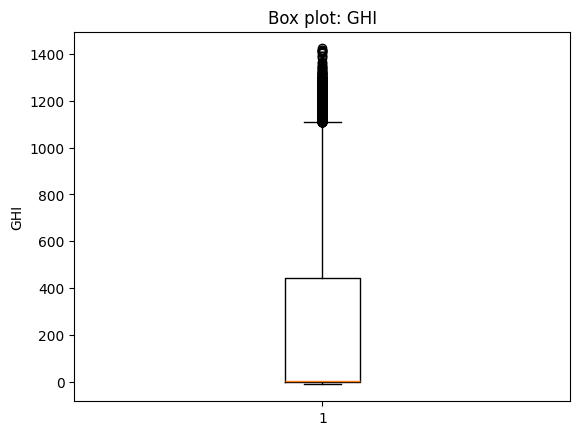

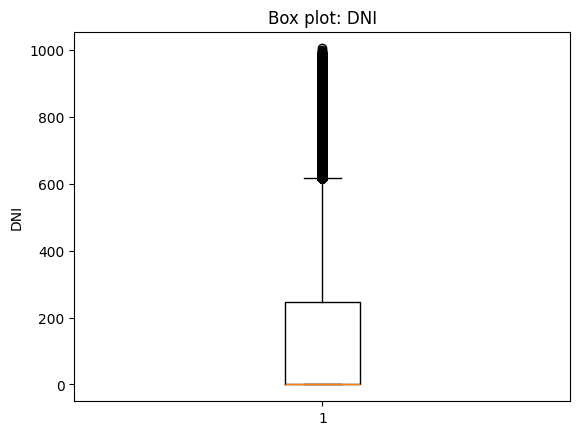

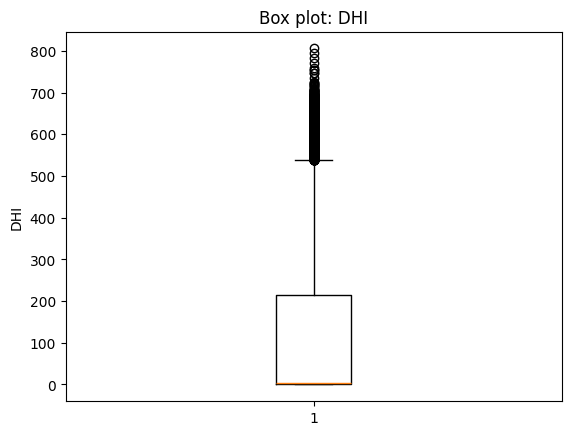

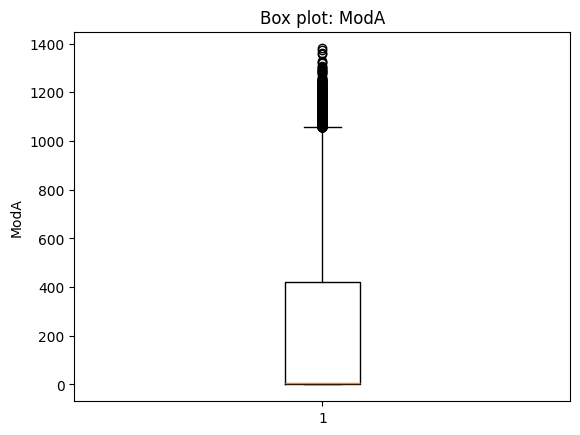

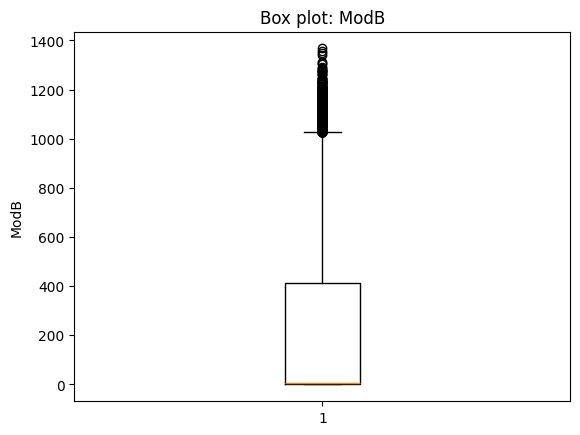

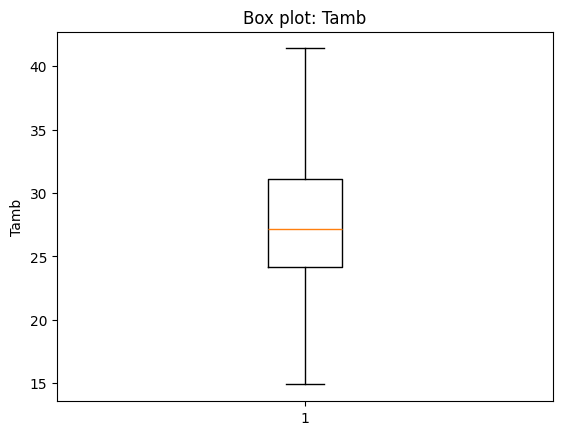

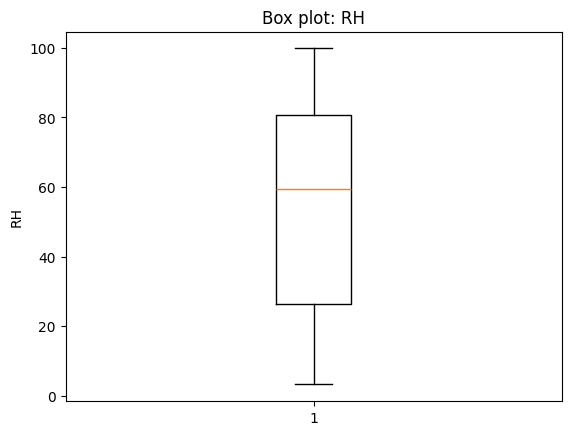

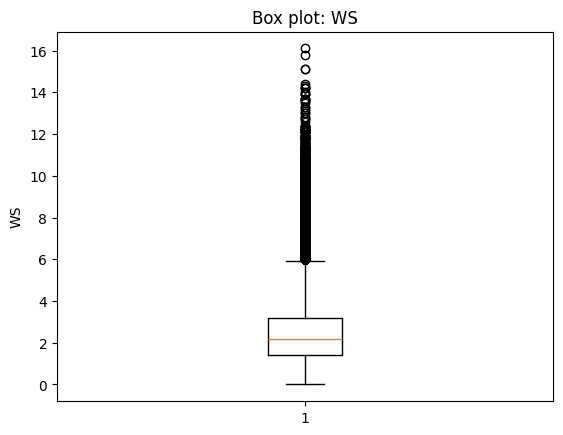

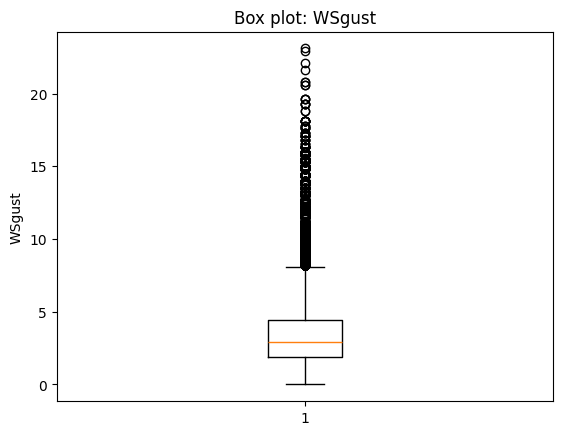

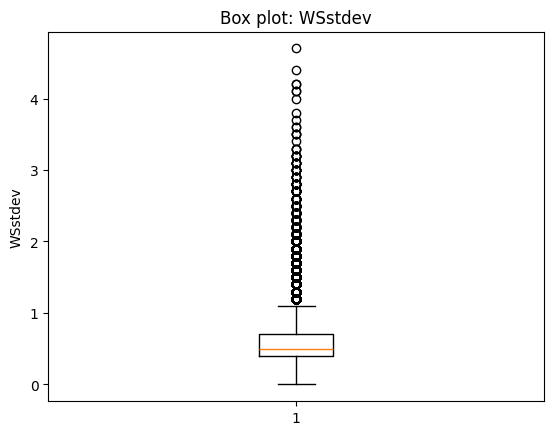

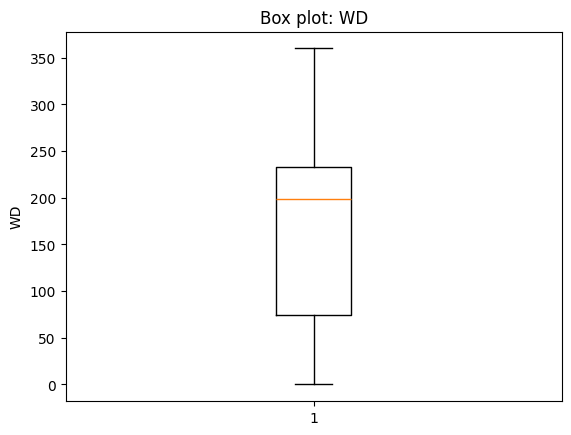

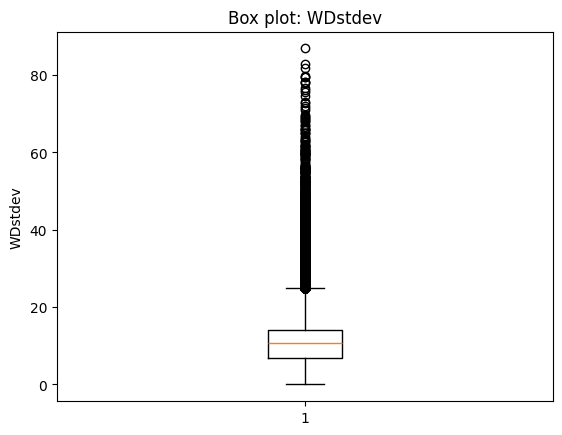

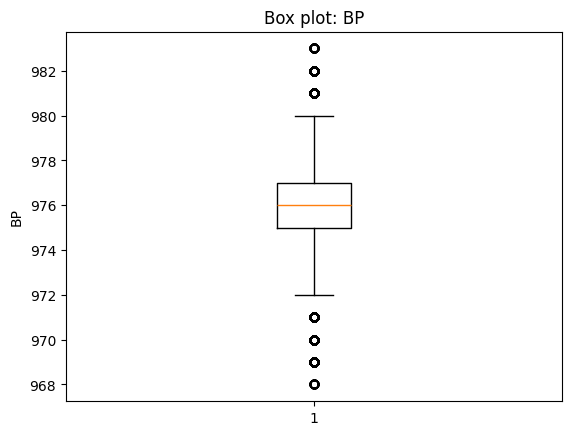

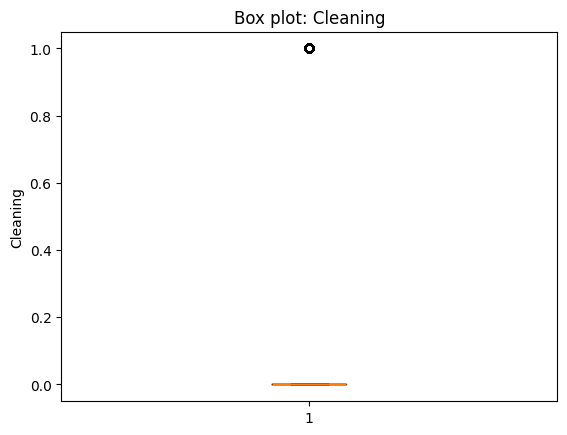

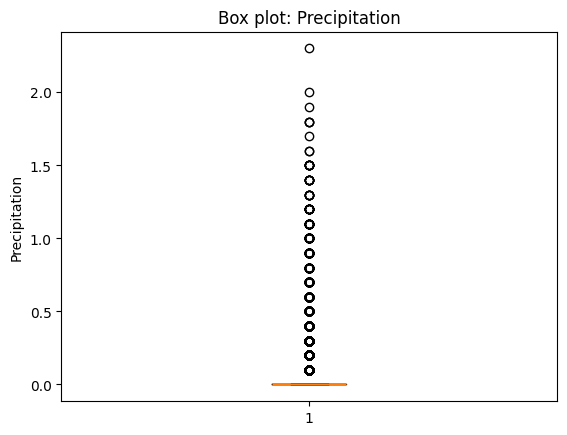

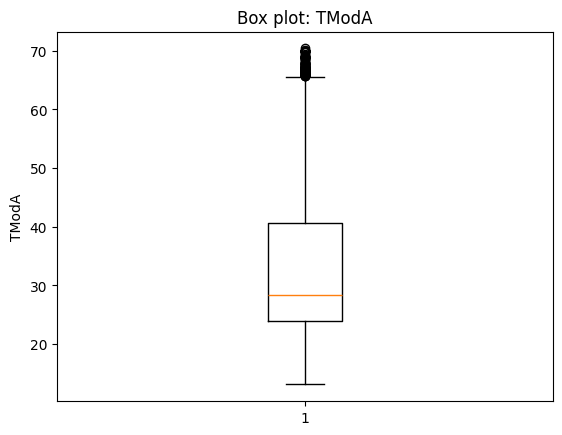

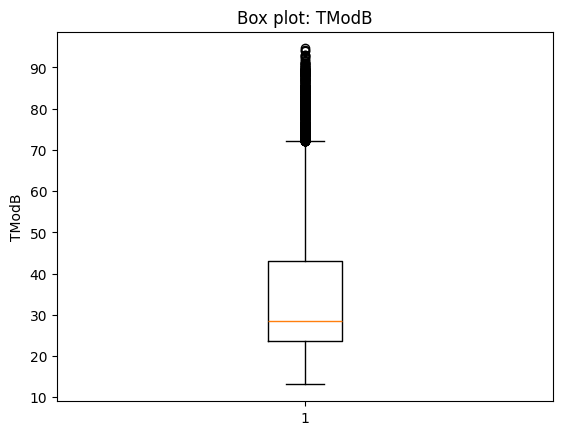

In [19]:
for c in num_cols:
    plt.figure()
    plt.boxplot(df[c].dropna(), vert=True)
    plt.title(f"Box plot: {c}")
    plt.ylabel(c)
    plt.show()

# DHI Box Plot intepretation 
- Extreme Positive Skew: The GHI distribution is highly positively skewed, with the median located almost at the minimum value.
- Low Value Concentration: The Interquartile Range (IQR) is tightly compressed at low GHI values (from $0$ to $\sim 450 \text{ W/m}^2$), indicating the majority of time is spent in darkness or low-sun conditions.
- High-End Outliers: The maximum GHI values (over $1100 \text{ W/m}^2$) appear as extreme positive outliers, representing relatively rare clear-sky, peak-irradiance periods.

---

# DNI Box Plot intepretation
- Extreme Positive Skew: The DNI distribution is extremely positively skewed, with the median (line inside the box) located at $\mathbf{0 \text{ W/m}^2}$ (or very close to it).

- Low Value Concentration: The Interquartile Range (IQR) is tightly compressed at the low end (from $0$ to $\sim 250 \text{ W/m}^2$). This shows that $50\%$ of the data points fall within this narrow, low range, representing nighttime, cloudy, or heavily obstructed periods.

- High-End Outliers: The upper whisker and numerous black dots extend dramatically up to the maximum DNI of $\mathbf{1000 \text{ W/m}^2}$. These data points are registered as extreme positive outliers, representing relatively rare clear-sky, unobstructed periods.

---

# DHI Box Plot intepretation
- Extreme Positive Skew: The DHI distribution is highly positively skewed, with the median (line inside the box) located almost at $\mathbf{0 \text{ W/m}^2}$.

- Low Value Concentration: The Interquartile Range (IQR) is tightly compressed at the low end (from $0$ to $\sim 220 \text{ W/m}^2$). This shows that $\mathbf{50\%}$ of the measurement time is spent in darkness or heavily overcast/low-light periods.

- High-End Outliers: The upper whisker and numerous black dots extend dramatically up to the maximum DHI of $\mathbf{800 \text{ W/m}^2}$. These values represent relatively rare periods of significant cloud cover that scatter large amounts of sunlight, or high-sun periods where some scattering is always present.

---

# ModA Box Plot intepretation
- Extreme Positive Skew: The ModA distribution is highly positively skewed, with the median (line inside the box) located very close to $0$.

- Low Value Concentration: The Interquartile Range (IQR) is tightly compressed at low values (from $0$ to $\sim 420 \text{ W/m}^2$). This confirms the module receives low irradiance or is completely dark for at least $50\%$ of the measurement time.

- High-End Outliers: The maximum irradiance values (over $1050 \text{ W/m}^2$) appear as extreme positive outliers, representing the relatively rare clear-sky, peak-irradiance periods. 

---

# ModB Box Plot Intepretation 
- Extreme Positive Skew: The ModB distribution is highly positively skewed, with the median (the line inside the box) located very close to $\mathbf{0}$.

- Low Value Concentration: The Interquartile Range (IQR) is tightly compressed at low values (from $0$ to $\sim 420 \text{ W/m}^2$). This shows that the module receives low irradiance or is completely dark for at least $\mathbf{50\%}$ of the measurement time.

- High-End Outliers: The maximum irradiance values (over $1050 \text{ W/m}^2$) appear as extreme positive outliers, representing the relatively rare clear-sky, peak-irradiance periods experienced by the module.

---

# Ambient Temptature intepretation
- Near-Symmetry: The distribution is relatively symmetrical around the median, indicating a near-normal distribution, which is common for temperature measurements.

- Central Tendency: The median is located around $27^\circ \text{C}$. The Interquartile Range (IQR), representing the middle $50\%$ of data points, spans from approximately $24^\circ \text{C}$ to $31^\circ \text{C}$.

- Overall Range: The temperatures range from a minimum around $15^\circ \text{C}$ to a maximum around $41^\circ \text{C}$, showing a consistently warm climate with a significant diurnal (daily) temperature swing.

---

# Relative humidity intepretation
- Symmetry around Median: The box plot shows a distribution that is roughly symmetrical around the median, which is approximately $\mathbf{60\%}$.

- Central Tendency: The Interquartile Range (IQR), representing the middle $50\%$ of the data, spans a wide range, from approximately $27\%$ to $\mathbf{81\%}$.

- Bimodal Confirmation: While symmetrical overall, the wide IQR and long whiskers (ranging from nearly $\mathbf{0\%}$ to $\mathbf{100\%}$), when viewed alongside the bimodal RH histogram, confirm that the humidity values are frequently concentrated at both the low and high extremes, despite the median being central.

---

# Wind speed Box Plot intepretation
- Extreme Positive Skew: The distribution is highly positively skewed, with the majority of the data concentrated at the low end of the scale.

- Low Wind Concentration: The median is approximately $\mathbf{2.3 \text{ m/s}}$. The Interquartile Range (IQR) spans from approximately $\mathbf{0.8 \text{ m/s}}$ to $\mathbf{3.3 \text{ m/s}}$, meaning the middle $50\%$ of the time, the wind speed is relatively low.

- High-End Outliers: High wind speeds (above $6 \text{ m/s}$) appear as numerous positive outliers, indicating that strong winds or gusts are relatively infrequent events.

---

# Wind speed gust Box Plot intepretation
- Extreme Positive Skew: The distribution is highly positively skewed (skewed to the right), showing that high wind gusts are rare events.

- Mode in Low Range: The highest frequency (mode) occurs in the low-to-moderate range, around $2.5 \text{ to } 3.5 \text{ m/s}$.

- Rarity of Strong Gusts: The count drops rapidly after the mode, indicating that high gusts (above $10 \text{ m/s}$) are extremely infrequent.

---

# Wind speed standard deviation Box Plot intepretation
- Extreme Positive Skew: The distribution is extremely positively skewed, indicating that the wind speed is highly stable most of the time.

- Low Variation Concentration: The median is approximately $\mathbf{0.5}$. The Interquartile Range (IQR) is very narrow, spanning from approximately $\mathbf{0.35}$ to $\mathbf{0.75}$, meaning the middle $50\%$ of the data shows minimal wind turbulence.

- Turbulence as Outliers: High variation (turbulent wind), represented by values above $1.1$, appears as numerous positive outliers, confirming that periods of high wind instability are infrequent.

---

# Wind direction Box Plot intepretation
- Symmetrical Range: The WD values span the full circular range, from $\mathbf{0^\circ}$ to $\mathbf{360^\circ}$.Central Tendency: The median is approximately $\mathbf{200^\circ}$ (South-Southwest).

- Wide Interquartile Range: The Interquartile Range (IQR) is exceptionally wide, spanning from $\mathbf{75^\circ}$ to $\mathbf{235^\circ}$. This confirms the bimodal distribution observed in the histogram (peaks around $75^\circ - 90^\circ$ and $210^\circ - 240^\circ$), meaning the wind frequently comes from two distinct and opposite sectors.

- No Outliers: The WD variable shows no distinct outliers, suggesting all directional measurements are well within the expected spread for the site.

---

# Wind direction standard deviation intepretation
- Extreme Positive Skew: The distribution is extremely positively skewed, indicating that the wind direction is highly stable and consistent most of the time.

- Low Variation Concentration: The median is approximately $\mathbf{12^\circ}$. The Interquartile Range (IQR) is tightly clustered between approximately $\mathbf{6^\circ}$ and $\mathbf{15^\circ}$, confirming the wind direction rarely shows high turbulence within the measurement interval.

- Turbulence as Outliers: High direction variability (high $WD_{stdev}$, e.g., above $25^\circ$) is represented by numerous positive outliers.

---

# Barometric Pressure Box Plot intepretation
- Near-Symmetry: The distribution is relatively symmetrical around the median, indicating a near-normal distribution.

- Central Tendency: The median is approximately $\mathbf{976 \text{ hPa}}$. The Interquartile Range (IQR) is narrow, spanning from approximately $\mathbf{975 \text{ hPa}}$ to $\mathbf{977 \text{ hPa}}$.

- Quantization and Outliers: The discrete outlier points (e.g., at $968 \text{ hPa}, 971 \text{ hPa}, 980 \text{ hPa}, 982 \text{ hPa}$) confirm the quantization (step-like nature) of the pressure measurements observed in the histogram.

- No Correlation with Solar: BP shows no significant correlation ($\mathbf{0.00}$ to $\mathbf{-0.21}$) with GHI, DNI, DHI, or $T_{ModA}$.

---

# Precipitation Box Plot intepretation
- Extreme Positive Skew: The distribution is highly positively skewed, with the median (the line inside the box) located precisely at $0.0 \text{ mm}$.

- Zero Concentration: The entire Interquartile Range (IQR) is compressed at $\mathbf{0.0 \text{ mm}}$, meaning the site records no measurable precipitation for the vast majority of the time.

- Rain Events as Outliers: All non-zero precipitation events (ranging from $>0.1 \text{ mm}$ up to $\sim 2.2 \text{ mm}$) appear as a vertical series of positive outliers.

---

# TModA Box Plot intepretation
- Extreme Positive Skew: The distribution is highly positively skewed, with the median (the line inside the box) located precisely at $0.0 \text{ mm}$.

- Zero Concentration: The entire Interquartile Range (IQR) is compressed at $\mathbf{0.0 \text{ mm}}$, meaning the site records no measurable precipitation for the vast majority of the time.

- Rain Events as Outliers: All non-zero precipitation events (ranging from $>0.1 \text{ mm}$ up to $\sim 2.2 \text{ mm}$) appear as a vertical series of positive outliers.

---

# TModB Box Plot intepretation
- Positive Skew: The distribution is positively skewed (skewed to the right), as the median is closer to the bottom of the box, and the upper whisker is longer and denser with outliers.

- Central Tendency: The median temperature is approximately $28^\circ \text{C}$. The Interquartile Range (IQR) spans from approximately $24^\circ \text{C}$ to $\mathbf{41^\circ \text{C}}$.

- High-End Outliers: Temperatures above $\mathbf{65^\circ \text{C}}$ appear as positive outliers. These high temperatures are a result of peak solar irradiance (GHI), which has an extremely strong positive correlation ($\mathbf{0.92}$) with $T_{ModA}$.

---

## 3) Outlier Detection

In [20]:
key_cols = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']
z = np.abs(stats.zscore(df[key_cols], nan_policy="omit"))
outliers_mask = (z > 3).any(axis=1)
print(f"Number of outlier rows detected: {outliers_mask.sum()}")


Number of outlier rows detected: 9251


In [21]:
df_clean = df[~outliers_mask]
print(f"Shape after removing outliers: {df_clean.shape}")

# 6️⃣ Save the cleaned dataset
df_clean.to_csv("../data/togo_clean.csv", index=False)
print("Cleaned dataset saved to: ../data/togo_clean.csv")

Shape after removing outliers: (516349, 18)
Cleaned dataset saved to: ../data/togo_clean.csv


## Bivariant Analysis

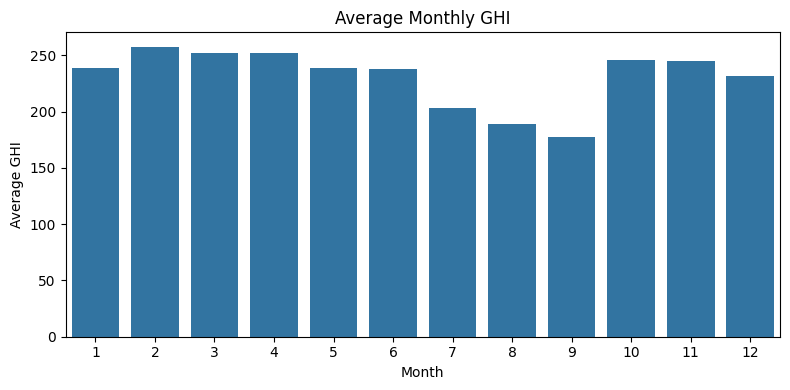

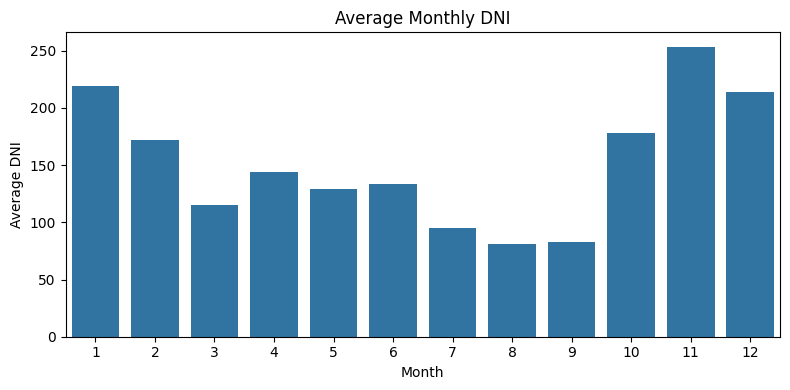

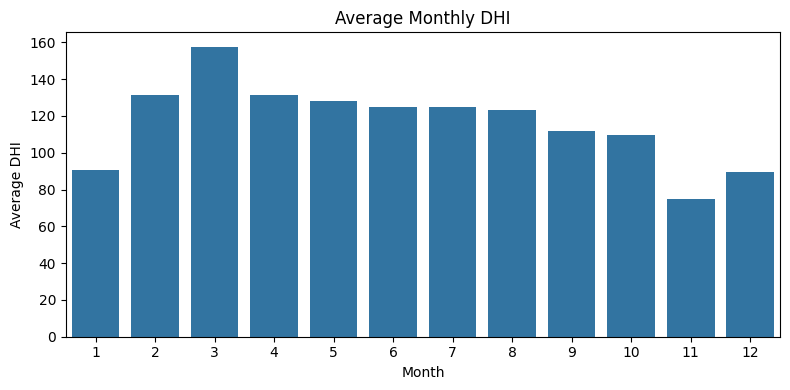

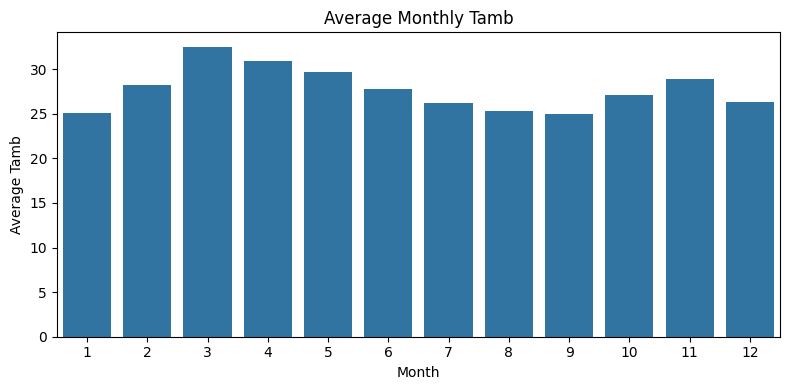

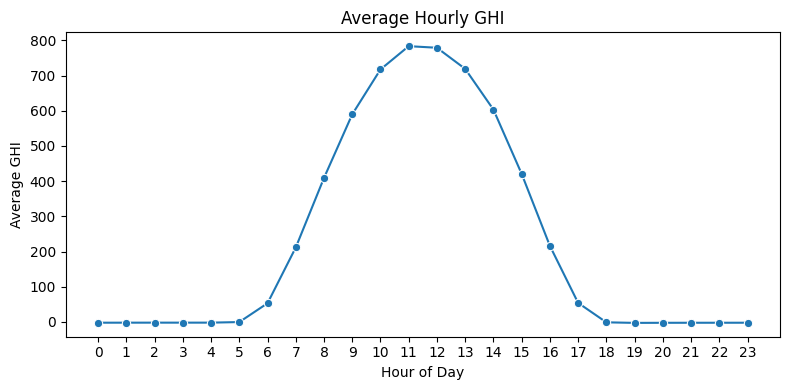

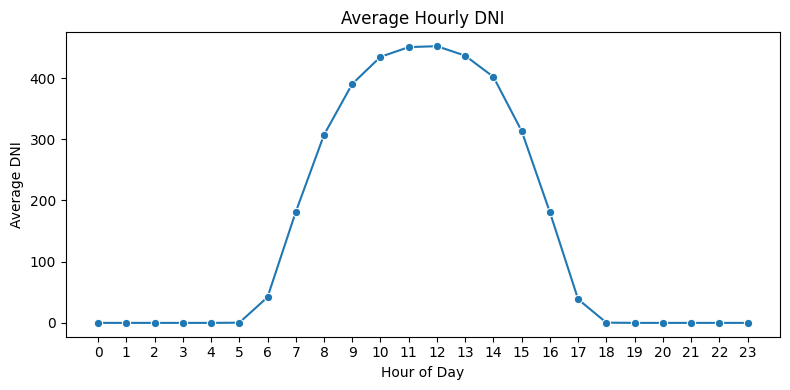

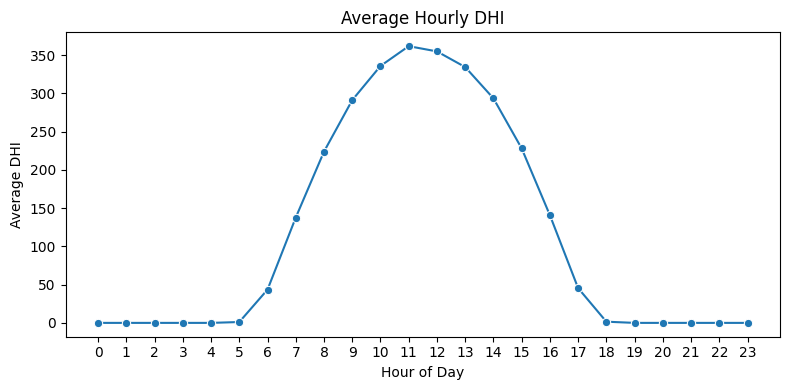

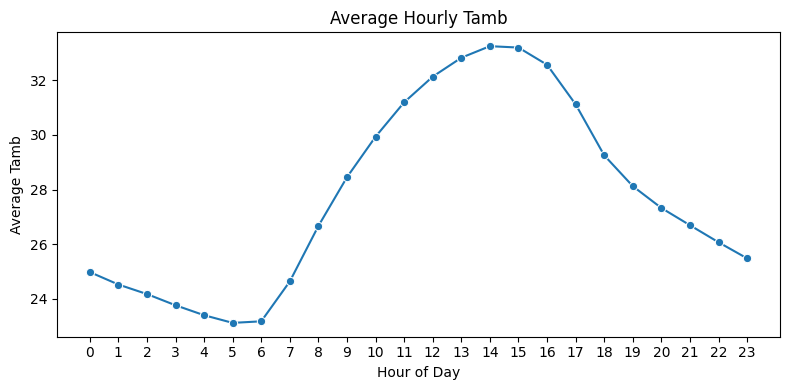

In [22]:
if not pd.api.types.is_datetime64_any_dtype(df['Timestamp']):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    # Drop invalid timestamps if any
    df = df.dropna(subset=['Timestamp'])

# 2️⃣ Columns to plot
cols = ['GHI', 'DNI', 'DHI', 'Tamb']

# 3️⃣ Extract Month and Hour temporarily
months = df['Timestamp'].dt.month
hours = df['Timestamp'].dt.hour

# --- Monthly Patterns ---
for c in cols:
    monthly_avg = df.groupby(months)[c].mean()
    
    plt.figure(figsize=(8, 4))
    sns.barplot(x=monthly_avg.index, y=monthly_avg.values)
    plt.title(f"Average Monthly {c}")
    plt.xlabel("Month")
    plt.ylabel(f"Average {c}")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# --- Hourly Trends ---
for c in cols:
    hourly_avg = df.groupby(hours)[c].mean()
    
    plt.figure(figsize=(8, 4))
    sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o')
    plt.title(f"Average Hourly {c}")
    plt.xlabel("Hour of Day")
    plt.ylabel(f"Average {c}")
    plt.xticks(range(0, 24))
    plt.tight_layout()
    plt.show()


## Time Series Analysis 

### Average Monthly GHI

- Seasonal Trend: The plot shows a moderate seasonal cycle in Global Horizontal Irradiance (GHI) throughout the year, with a noticeable drop during the middle of the year.

- Peak Solar Months: The highest average GHI is recorded in Month 2 (February) (approx. 258 units), followed very closely by Month 3 (March), Month 4 (April), Month 10 (October), and Month 11 (November). Values for all these months are approximately 245-258 units. This suggests a bimodal solar regime with high irradiance in both the late winter/spring and the fall.

- Low Solar Months: The lowest average GHI occurs during Month 9 (September) (dropping to $\approx **178**$ units). This mid-year dip, spanning from Month 7 to Month 9, is characteristic of a location experiencing heavy cloud cover or a rainy season during the late summer/early autumn months, significantly reducing GHI.

### Average Monthly DNI

- Peak Solar Months: The highest DNI is recorded in Month 11 (November), with a value of approximately 255 units. Month 1 (January) and Month 12 (December) are also very high, around 218 and 215 units, respectively. This indicates strong clear-sky conditions in the late autumn and early winter.

- Low Solar Months: The lowest DNI occurs during the middle of the year, specifically in Month 7, 8, and 9. The minimum value is in Month 8 (August), which is just under 85 units. This severe dip suggests an extended period of heavy cloud cover, monsoon, or rainy season during the summer months.

- Overall Trend: The pattern is a U-shaped curve, or bimodal, with high DNI in the start and end of the year, and a sharp, prolonged drop in the middle of the year. This is opposite to the typical Northern Hemisphere solar energy profile where DNI is highest in summer.

### Average Monthly DHI
- Peak Solar Months: The highest average DHI is recorded in Month 3 (March), with a value of approximately 158 units. High DHI is characteristic of months with more cloud cover and atmospheric scattering.Months with High DHI: Months 2, 3, 4, 5, 6, 7, and 8 all show relatively high DHI values, generally ranging from 120 to 158 units. This suggests that the spring and summer months have more diffuse light due to increased cloudiness or humidity.

- Low Solar Months: The lowest average DHI occurs in Month 11 (November), dropping to $\approx **75**$ units. Month 1, 10, and 12 are also among the lowest.

- Overall Trend: The DHI is high for the first half to two-thirds of the year (spring and summer) and then experiences a sharp drop in the late autumn/early winter (Months 10, 11, 12, and 1). This is the opposite trend of the Direct Normal Irradiance (DNI) chart you analyzed earlier (where DNI was highest in Months 1, 11, 12, and lowest in the middle of the year).

### Average Monthly Tamb
- Peak Temperature Month: The highest average ambient temperature is recorded in Month 3 (March), with a value of approximately 32°. This suggests late winter/early spring is the hottest period of the year at this location.

- Months with High Temperatures: Months 3, 4, 5, and 6 consistently show high average temperatures, generally ranging from 27.5°C to 32°C.Low Temperature Months: The lowest temperatures occur in Months 8 and 9 (August and September), with a value of approximately 25°C.

- Overall Trend: The temperature starts moderately high, peaks in Month 3, gradually decreases through the mid-year (Months 7, 8, 9), and then slightly rises again towards the end of the year (Months 10, 11, 12). The seasonal variation is relatively mild, with the difference between the peak (32°C) and the trough (25°C) being about $7^{\circ}C$.

## Diurnal Analysis

### Average Hourly GHI
- Symmetrical Shape: The GHI profile follows a symmetrical bell curve typical of solar irradiance over an average day.

- Peak Solar Hour: The maximum average GHI of approximately $\mathbf{780}$ units (likely $\mathbf{W/m^2}$) is reached between Hour 12 and Hour 13 (12 PM and 1 PM), which represents the solar noon period.

- Daylight Hours: Significant irradiance is present from approximately Hour 7 (7 AM) to Hour 17 (5 PM). The solar window, where GHI is above zero, spans from around Hour 6 (6 AM) to Hour 18 (6 PM), defining an average daily solar window of about 12 hours.

- Nighttime/Low Values: From Hour 19 (7 PM) through Hour 5 (5 AM), the GHI is consistently zero.

### Average Hourly DNI
- Symmetrical Shape: The DNI profile exhibits a symmetrical bell curve typical of direct sunlight in a clear-sky environment.

- Peak Solar Hour: The maximum average DNI of approximately 440 units (likely $W/m^2$) is reached between Hour 11 and Hour 13. This peak around solar noon indicates the time of maximum concentration of direct sunlight.

- Daylight Hours: Significant DNI is present from approximately Hour 7 (7 AM) to Hour 17 (5 PM). The total solar window, where DNI is above zero, spans from around Hour 6 (6 AM) to Hour 18 (6 PM), indicating an average daily solar window of about 12 hours.

- Nighttime/Low Values: From Hour 18 (6 PM) through Hour 5 (5 AM), the DNI is consistently zero.

- Comparison to GHI: When compared to the previous GHI plot (which peaked around 780), the DNI peak of 440 indicates that while the sun is very strong, a significant portion of the total solar energy (GHI) comes from diffuse light (DHI), as $GHI \approx DNI + DHI$.

### Average Hourly DHI
- Shape and Duration: The profile forms a symmetrical bell curve, indicating an average solar day duration of approximately 12 hours (from 6 AM to 6 PM).

- Peak Value: The maximum average DHI is approximately 360 units ($W/m^2$), reached around 11 AM to 12 PM.

- Significance: This high peak (360) is a significant portion of the total solar energy (GHI $\approx 780$), indicating that the location experiences a considerable amount of scattered light due to clouds or atmospheric haze, even during peak sun hours.

### Average Hourly Ambient Temperature
- Pattern and Range: The chart shows a typical diurnal (daily) temperature cycle, with temperatures ranging from a low of $\approx **23.3^{\circ}\text{C}$** at dawn (Hour 5-6) to a high of $\approx **33.5^{\circ}\text{C}$** in the mid-afternoon.

- Peak Time: The maximum temperature occurs significantly after solar noon, between Hour 14 and Hour 15 (2:00 PM - 3:00 PM), due to thermal inertia.

- Swing: The daily temperature swing is substantial, measuring over $10^{\circ}\text{C}$.

In [23]:
# Group by Cleaning flag (1 = cleaned, 0 = not cleaned)
grouped = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
print(grouped)

                ModA        ModB
Cleaning                        
0         225.979064  219.401351
1         535.186477  532.211744


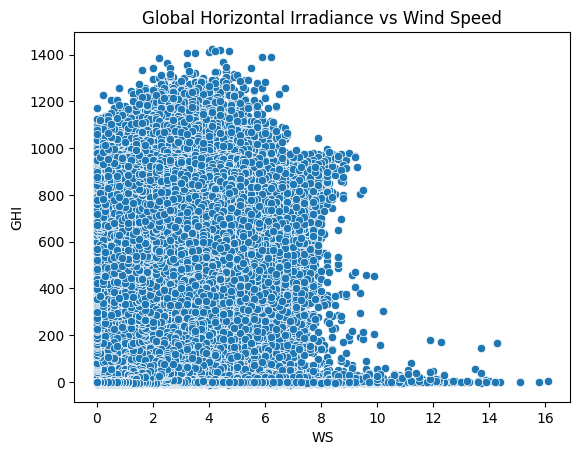

In [24]:
sns.scatterplot(data=df, x="WS", y="GHI")
plt.title("Global Horizontal Irradiance vs Wind Speed")
plt.show()

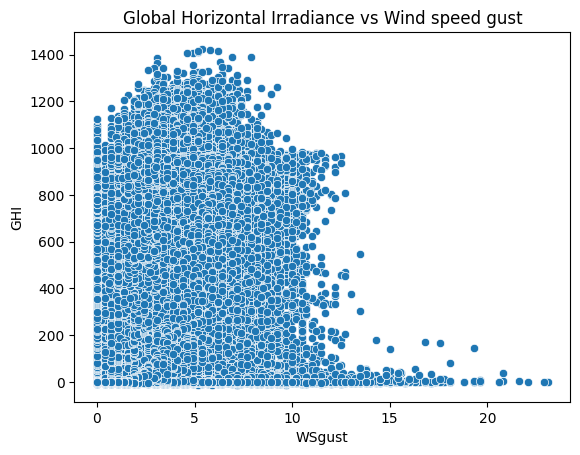

In [25]:
sns.scatterplot(data=df, x="WSgust", y="GHI")
plt.title("Global Horizontal Irradiance vs Wind speed gust")
plt.show()

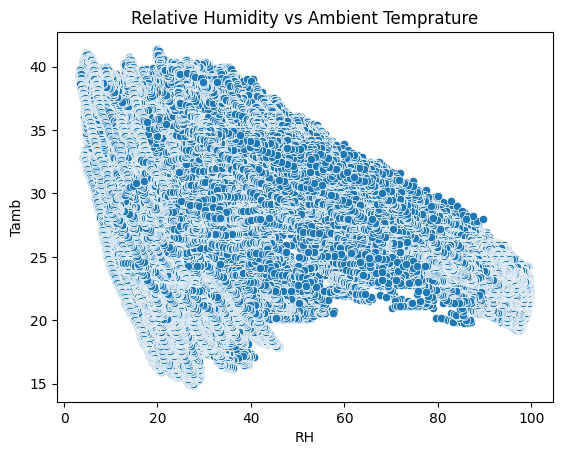

In [26]:
sns.scatterplot(data=df, x="RH", y="Tamb")
plt.title("Relative Humidity vs Ambient Temprature")
plt.show()

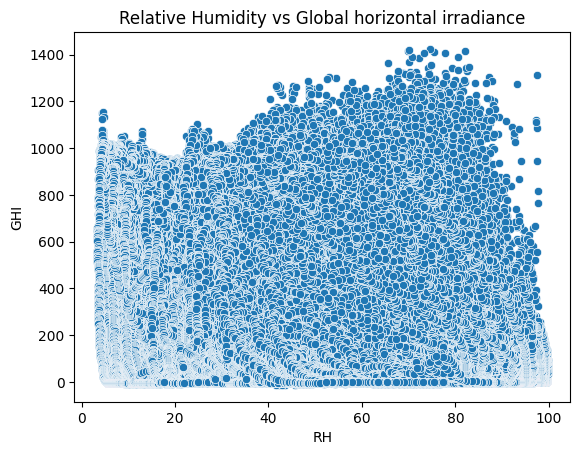

In [27]:
sns.scatterplot(data=df, x="RH", y="GHI")
plt.title("Relative Humidity vs Global horizontal irradiance")
plt.show()

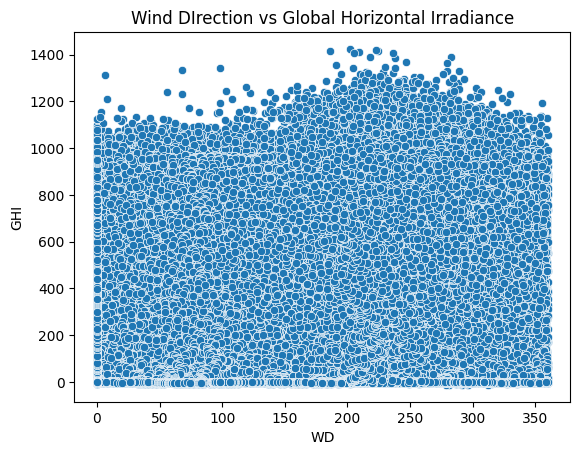

In [28]:
sns.scatterplot(data=df, x="WD", y="GHI")
plt.title("Wind DIrection vs Global Horizontal Irradiance")
plt.show()

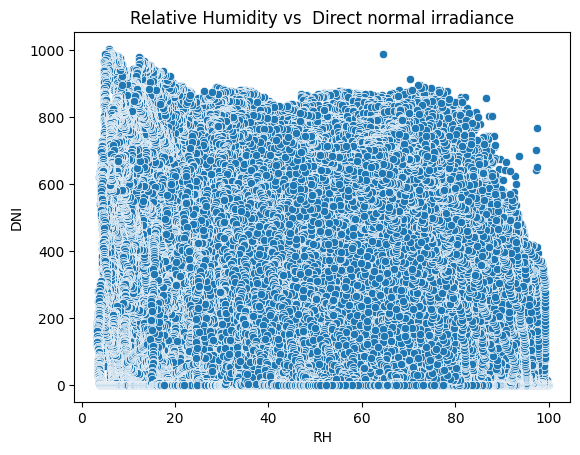

In [29]:
sns.scatterplot(data=df, x="RH", y="DNI")
plt.title("Relative Humidity vs  Direct normal irradiance")
plt.show()

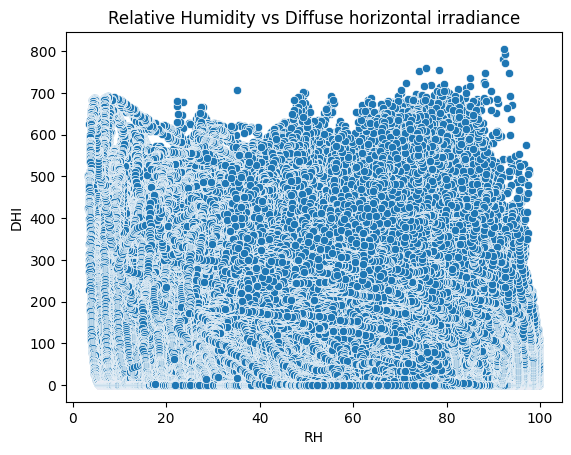

In [30]:
sns.scatterplot(data=df, x="RH", y="DHI")
plt.title("Relative Humidity vs Diffuse horizontal irradiance")
plt.show()

<Figure size 800x800 with 0 Axes>

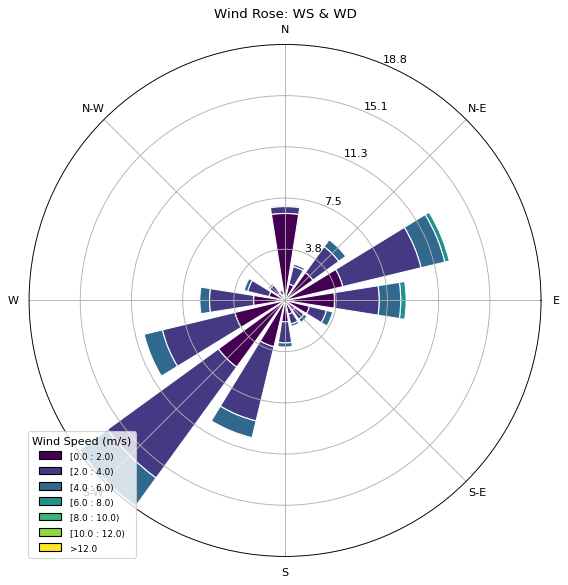

In [31]:
df_wind = df.dropna(subset=['WS', 'WD'])  # remove missing values

plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(df_wind['WD'], df_wind['WS'],
       normed=True,
       opening=0.8,
       edgecolor='white',
       bins=[0, 2, 4, 6, 8, 10, 12])
ax.set_legend(title="Wind Speed (m/s)")
plt.title("Wind Rose: WS & WD")
plt.show()

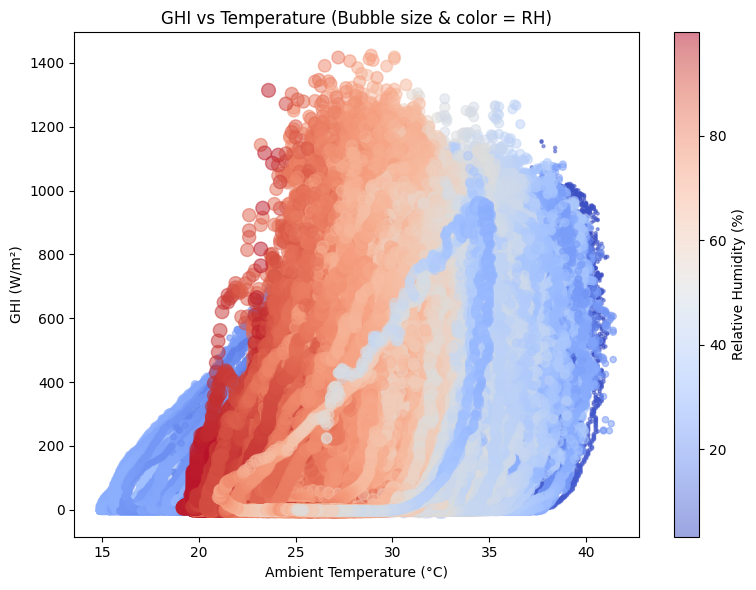

In [32]:

plt.figure(figsize=(8,6))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH'], alpha=0.5, c=df['RH'], cmap='coolwarm')
plt.colorbar(label='Relative Humidity (%)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs Temperature (Bubble size & color = RH)')
plt.tight_layout()
plt.show()


##  Bivariate Analysis – Scatter Plot Interpretation

1. Global Horizontal Irradiance vs. Wind Speed
- Relationship: The plot exhibits a negative constraint, forming a distinct wedge or triangular shape. This means that high GHI values are constrained by high wind speeds.

- Peak GHI: The highest GHI values ($\approx \mathbf{1400}$ units) occur exclusively when the wind speed is low to moderate ($\approx 2$ to $7 \text{ WS units}$).

- Impact of High Wind: As wind speed increases past $\approx \mathbf{8 \text{ WS units}}$, the maximum GHI sharply drops. For very high wind speeds ($\mathbf{> 10 \text{ WS units}}$), GHI is severely limited, almost always staying below 400 units.

- Interpretation: High wind speeds are strongly associated with weather events (storms, heavy cloud cover) that drastically reduce the amount of solar radiation (GHI) reaching the ground.

2. Global Horizontal Irradiance vs. Wind Speed Gust
- Relationship: The plot displays a negative constraint, forming a distinct wedge shape where high GHI is prohibited by high wind speed gusts.

- Peak GHI: The highest GHI values ($\approx \mathbf{1400}$ units) occur when the wind speed gust is low to moderate ($\approx 2$ to $8 \text{ WSgust units}$).Impact of High Gusts: The constraint is more severe with gusts than with average wind speed. As the gust speed increases past $\approx \mathbf{10 \text{ WSgust units}}$, the maximum GHI drops sharply.

- Extreme Gusts: For very high gust speeds ($\mathbf{> 15 \text{ WSgust units}}$), GHI is severely limited, almost always staying below 200 units.

- Interpretation: This confirms that strong wind gusts are a reliable indicator of adverse weather conditions (e.g., storms, heavy cloud cover) that significantly diminish the available solar resource (GHI).

3. Relative Humidity vs. Ambient Temperatur
- Strong Negative Correlation: The plot shows a clear, strong negative correlation between Relative Humidity (RH) and Ambient Temperature ($\text{T}_{\text{amb}}$), forming a roughly linear, downward sloping pattern.

- High Temperature/Low Humidity: The highest temperatures ($\approx 35^\circ\text{C}$ to $40^\circ\text{C}$) are exclusively associated with low Relative Humidity (below 40%). This is a typical relationship, as warmer air can hold more moisture, thus often leading to a lower relative humidity percentage for the same amount of actual water vapor.

- Low Temperature/High Humidity: The highest Relative Humidity (up to 100%) is associated with the lowest temperatures ($\approx 15^\circ\text{C}$ to $25^\circ\text{C}$). This occurs during the night or on very cold, damp, or rainy days where the air cools to or below its dew point.

- General Range: The majority of the data falls within an inverse band, illustrating that high humidity and high temperature rarely occur simultaneously at this location.

4. Relative Humidity vs. Global Horizontal Irradiance
- Relationship: The data shows a wedge-shaped relationship. The maximum possible GHI is constrained by both very low and very high Relative Humidity.

- Peak GHI Window: The absolute highest GHI values (up to $\mathbf{1400}$ units) occur when the Relative Humidity is in the moderate-to-high range (approx. $\mathbf{60\% \text{ to } 90\%}$).

- Interpretation: This suggests that peak solar energy is achieved on days that are clear but moist. GHI drops sharply when RH is near $100\%$, indicating that fully saturated air or thick clouds severely limit solar radiation.

5. Wind Direction vs. Global Horizontal Irradiance
- Relationship: The plot shows no significant correlation or constraint between Wind Direction and the maximum achievable GHI.

- Irradiance Range: The GHI spans its full possible range (from 0 to $\approx \mathbf{1400}$ units) across all wind directions from $0^\circ$ to $360^\circ$.

- Interpretation: A clear, sunny sky (high GHI) is equally likely to occur regardless of the direction the wind is blowing. This suggests that the major GHI-reducing weather systems are not consistently tied to a single wind direction at this location.

6. Relative Humidity vs. Direct Normal Irradiance
- Relationship: The data displays a complex, non-linear constraint where DNI is limited at both extremes of Relative Humidity.

- Peak DNI Window: The highest DNI values (up to $\approx \mathbf{1000}$ units) occur when the Relative Humidity is in the low-to-moderate range ($\approx \mathbf{5\% \text{ to } 85\%}$). This indicates that the atmosphere is often clear enough for strong direct sunlight across a wide range of moisture levels.

- High RH Constraint: As RH approaches saturation ($\approx 90\%$ to $100\%$), the maximum DNI is severely limited, dropping to $\approx \mathbf{400}$ units or less. This is expected, as high humidity (approaching 100%) often leads to thick clouds and precipitation, which block the direct sunlight.

- Low RH Constraint: The maximum DNI also seems to be slightly limited at very low humidity (below 5%), though the overall constraint is less defined than at high RH.

7. Relative Humidity vs. Diffuse Horizontal Irradiance
- Relationship: The data shows a strong positive correlation forming a wedge shape where maximum DHI increases significantly with Relative Humidity.

- Peak DHI Window: The absolute highest DHI values (up to $\approx \mathbf{800}$ units) occur when the Relative Humidity is very high, specifically between $\approx \mathbf{75\% \text{ and } 95\%}$. 
- Interpretation:
   - High RH: High Relative Humidity often corresponds to heavy atmospheric moisture or cloud cover, which causes incoming sunlight to be scattered, thereby maximizing the DHI (diffuse light) component.
   - Low RH: When RH is low (below $\approx 40\%$), the maximum DHI is capped at lower values ($\approx 700$ units), indicating a drier, potentially clearer atmosphere where direct light (DNI) dominates over scattered light (DHI).

8. Wind Rose (Wind Speed & Wind Direction)
- Dominant Wind Directions: The prevailing winds come primarily from two main sectors, indicating a bi-directional pattern:
  - South-Southeast (S-SE) to South (S): This is the most dominant sector, with a high frequency of winds blowing from the South and Southeast directions.
  - North-East (N-E): This is the second most dominant sector, contributing significantly to the overall wind profile.
- Highest Wind Speeds:
  - The highest wind speeds (yellow/lime green bands, $>10 \text{ m/s}$) are concentrated in the South-Southeast (S-SE) and North-East (N-E) directions.
- Calm Conditions: The frequency of very low wind speeds (the central dark purple circle, $0.0 - 2.0 \text{ m/s}$) appears relatively small, suggesting the site rarely experiences long periods of complete calm.

- Overall: The wind resource is strongly directional, peaking in the S-SE sector, which is important for designing wind farms or directional solar installations to mitigate dust.

9. GHI vs. Temperature (RH Overlay)
- Relationship: The data forms a classic triangular shape, characteristic of a positive constraint. Higher temperatures allow for, but do not guarantee, higher maximum GHI.

- Peak GHI Window: The absolute highest GHI values ($\approx \mathbf{1400 \text{ W/m}^2}$) are achieved in a mid-temperature range, approximately $\mathbf{25^\circ\text{C} \text{ to } 35^\circ\text{C}}$.

- Low Temperature Constraint: Below $25^\circ\text{C}$, the maximum GHI is capped, falling below $1200 \text{ W/m}^2$.

- Relative Humidity (RH) Impact (Color Scale):
  - Low Temperatures (Left): High GHI at lower temperatures ($\approx 20^\circ\text{C} \text{ to } 25^\circ\text{C}$) is dominated by red/orange bubbles (Low RH).
  - High Temperatures (Right): High GHI at higher temperatures ($\approx 30^\circ\text{C} \text{ to } 35^\circ\text{C}$) is dominated by blue/light blue bubbles (High RH).
  - Interpretation: This indicates that the highest irradiance is achieved across a wide range of humidity conditions. The relationship between $\text{T}_{\text{amb}}$ and RH (which is inversely related) is what causes this color split, with the maximum possible GHI found within this defined temperature/RH band.

## Correlation Matrix & Heatmap (numeric)

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
GHI,1.000000,0.877293,0.852080,0.994964,0.995439,0.562533,-0.258077,0.421698,0.443923,0.399646,0.089896,0.479291,0.059116,0.024725,-0.034598,0.898211,0.919220
DNI,0.877293,1.000000,0.532717,0.889702,0.889708,0.504499,-0.327887,0.366667,0.384870,0.343437,-0.017950,0.397511,0.047465,0.019777,-0.031397,0.765881,0.783572
DHI,0.852080,0.532717,1.000000,0.833037,0.832648,0.489758,-0.155016,0.390597,0.410531,0.367005,0.154095,0.454318,0.052307,0.026179,-0.033330,0.802319,0.820360
ModA,0.994964,0.889702,0.833037,1.000000,0.999564,0.561114,-0.287038,0.420344,0.442563,0.398559,0.057154,0.472525,0.064175,0.022523,-0.034314,0.886888,0.906796
ModB,0.995439,0.889708,0.832648,0.999564,1.000000,0.556133,-0.280072,0.421543,0.443570,0.398978,0.061090,0.472106,0.068740,0.023482,-0.034269,0.885551,0.906427
Tamb,0.562533,0.504499,0.489758,0.561114,0.556133,1.000000,-0.400410,0.197145,0.221104,0.227084,0.094900,0.361367,-0.520770,0.019391,-0.060178,0.805580,0.740832
RH,-0.258077,-0.327887,-0.155016,-0.287038,-0.280072,-0.400410,1.000000,-0.147589,-0.131119,-0.075714,0.521269,-0.075874,0.225176,-0.007095,0.068177,-0.244825,-0.224668
WS,0.421698,0.366667,0.390597,0.420344,0.421543,0.197145,-0.147589,1.000000,0.977587,0.728018,0.164655,0.505133,0.087915,0.008371,0.099562,0.328273,0.353334
WSgust,0.443923,0.384870,0.410531,0.442563,0.443570,0.221104,-0.131119,0.977587,1.000000,0.827358,0.185546,0.562013,0.085957,0.009440,0.107898,0.357374,0.380626
WSstdev,0.399646,0.343437,0.367005,0.398559,0.398978,0.227084,-0.075714,0.728018,0.827358,1.000000,0.240927,0.593584,0.065415,0.010888,0.105231,0.345920,0.359923


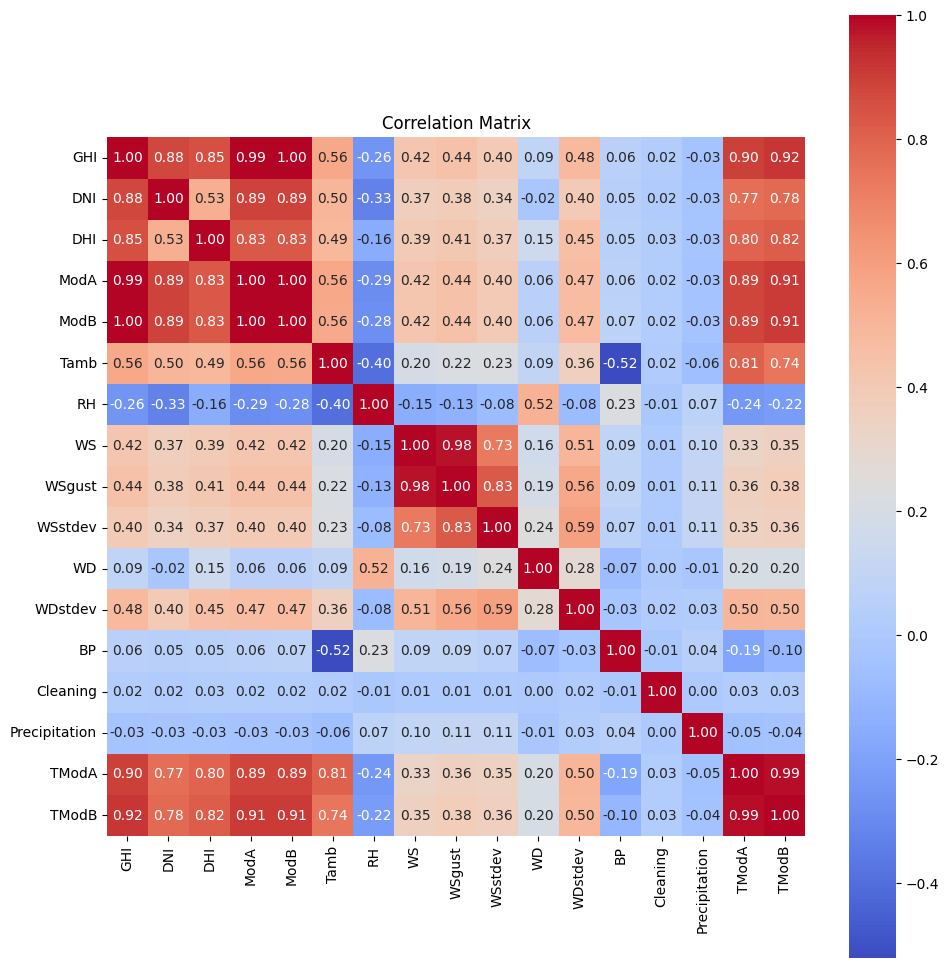

In [33]:
corr = df[num_cols].corr()
display(corr)

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


# Correlation Matrix Interpretation (Heatmap)

## Strongest Positive Correlations (Related to Solar Energy)

- Irradiance & Module Temperature (Very High): The strongest positive correlations exist between the irradiance variables (GHI, DNI, DHI, ModA, ModB) and the module temperatures ($\text{T}_{\text{ModA}}$, $\text{T}_{\text{ModB}}$). The correlations are exceptionally high, with coefficients often above $\mathbf{0.90}$ (e.g., ModA vs. $\text{T}_{\text{ModB}}$ is $0.93$, GHI vs. $\text{T}_{\text{ModA}}$ is $0.92$). This confirms that solar irradiance is the primary driver of PV module temperature.

- Irradiance Components (High): GHI, DNI, and DHI are all highly correlated with each other. The correlation between DNI and DHI is slightly lower ($\mathbf{0.54}$) than others, which is expected since the two components trade off depending on cloud cover.

- Ambient Temperature ($\text{T}_{\text{amb}}$) & Module Temperature (High): $\text{T}_{\text{amb}}$ shows a strong positive correlation with the module temperatures ($\text{T}_{\text{ModA}}$ and $\text{T}_{\text{ModB}}$), with coefficients around $\mathbf{0.86}$ to $\mathbf{0.88}$.

## Strongest Negative Correlations (Inverse Relationships)


- Relative Humidity (RH) & Irradiance/Temperature (Moderate): RH exhibits the most significant negative correlations, particularly with Ambient Temperature ($\mathbf{-0.79}$) and all Irradiance/Module Temperature variables (ranging from $\mathbf{-0.55}$ to $\mathbf{-0.64}$). This suggests that high humidity often coincides with lower air temperature and less direct, peak solar radiation.

- Irradiance & Wind Speed (Weak-to-Moderate): Wind speed (WS and $\text{WS}_{\text{gust}}$) shows a weak negative correlation with GHI, DNI, and DHI (around $\mathbf{-0.37}$ to $\mathbf{-0.41}$).


## Key Weather Interactions

- Wind Variables (Very High): Wind Speed (WS), Wind Speed Standard Deviation ($\text{WS}_{\text{stdev}}$), and Wind Gust ($\text{WS}_{\text{gust}}$) are all highly correlated with each other (coefficients $\mathbf{0.84}$ to $\mathbf{0.97}$). This confirms their measurements capture similar atmospheric turbulence/motion.

- Barometric Pressure (BP) (Weak/Moderate): BP has a moderate negative correlation with RH ($\mathbf{-0.57}$) and weaker negative correlations with most other variables.

- Precipitation: This variable has a near zero correlation with almost everything. Note: The scatter plot for Precipitation vs. GHI previously analyzed showed a strong constraint (high GHI only occurs when Precipitation is zero), which this linear Pearson correlation coefficient ($\mathbf{-0.03}$ vs GHI) does not fully capture.